<a href="https://colab.research.google.com/github/Batovs/MAP2110-2021-Modelagem-Matematica/blob/main/Projeto%204/Tomografia%20Computadorizada%20Imagem80x80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from skimage import io
from skimage import data
import matplotlib.pyplot as plt
import math
from scipy import sparse
from scipy.sparse import csr_matrix
  

In [ ]:
def ProjecaoOrtogonal (a,b,x_star):
  #Função para achar o ponto ortogonal entre a reta ax = b e o ponto x*
  num = b - (np.dot(a.T,x_star))
  den = np.dot(a.T,a)

  xp = x_star + num/den*a

  return xp

In [ ]:
def Algoritmo2 (a,b,xstar,n):
  
  lenb = len(b)
  xstarC = np.atleast_2d(xstar).T #lista em vetor coluna
  x0 = ProjecaoOrtogonal(np.array(a[0].T),b[0],xstarC)

  for j in range(n):
    for i in range (lenb):
      x0 = ProjecaoOrtogonal(np.array(a[i].T),b[i],x0)
   
  
  return x0.T

In [ ]:
def MatrizResultado(tab_df):
  
  tab_df = pd.DataFrame(tab_df) #Para Funcionar com df ou array
  resultado = tab_df.tail(1)
  len_tab = len(resultado.iloc[0])
  n = int(math.sqrt(len_tab))
  saida = np.zeros((n,n))

  #Resultados em Matriz Quadrada n por n
  for i in range (n):
    for j in range (n):
      saida[i][j] = resultado.iloc[0][i*n + j]

  return saida

In [ ]:
def CriaListab(matriz_a,imagem_np):
  len_img = len(imagem_np)
  pixel = len_img*len_img #n pixel para imagem quadrada
  vetor_pixel = [] #inicial
  for i in range (len_img):
    for j in range (len_img):
      vetor_pixel.append(imagem_np[i][j])
  vetor_pixel = np.array(vetor_pixel)

  b = []
  for k in range(len(matriz_a)):
    res = np.array(matriz_a[k])*vetor_pixel
    b.append(res.sum())

  return b


In [ ]:
def CriaVetp(matriz_a,imagem_np):
  len_img = len(imagem_np)
  pixel = len_img*len_img #n pixel para imagem quadrada
  vetor_pixel = [] #inicial
  for i in range (len_img):
    for j in range (len_img):
      vetor_pixel.append(imagem_np[i][j])
  vetor_pixel = np.array(vetor_pixel)


  return vetor_pixel

In [ ]:
matriz_a_80_csr = sparse.load_npz('matriz_a_80_csr.npz')
matriz_a_80 = matriz_a_80_csr.todense()
matriz_a_80.shape

(478, 6400)

Teste Imagem


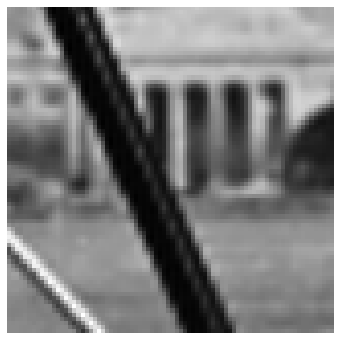

In [ ]:
#Crop imagem camera em 80x80
camera = data.camera()
camera80 = np.zeros((80,80))
for i in range(80):
  for j in range(80):
    camera80[i][j]= camera[300+i][300+j]


plt.figure(figsize=(6, 6))
plt.imshow(camera80, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
camera80

array([[255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.]])

In [ ]:
matriz_a_teste = matriz_a_80
b_teste = CriaListab(matriz_a_teste,camera80)
x_teste = np.zeros(matriz_a_teste.shape[1])
#x_teste = np.random.randint(0,255,size=(matriz_a_teste.shape[1]))
#x_teste = CriaVetp(matriz_a_teste,camera80)
teste80 = Algoritmo2(matriz_a_teste,b_teste,x_teste,50)
teste80

array([[141.        , 133.675     , 127.74906517, ..., 116.20488782,
        123.        , 126.        ]])

In [ ]:
teste80_df = pd.DataFrame(teste80[-1]).T
teste80img = MatrizResultado(teste80_df)


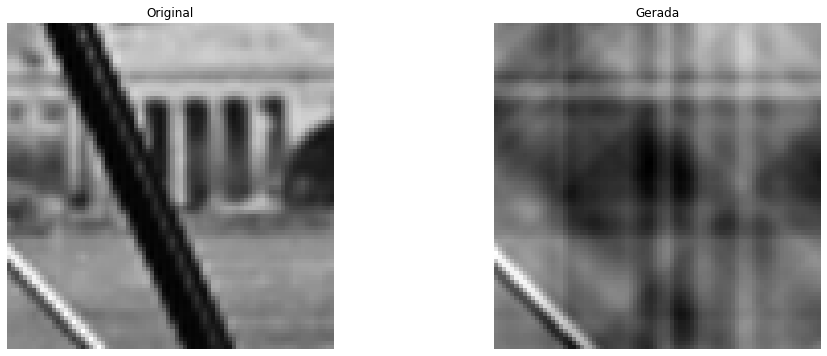

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6),
                               sharex=True, sharey=True)

ax0.imshow(camera80, cmap=plt.cm.gray)
ax0.axis('off')
ax0.set_title('Original')
ax1.imshow(teste80img, cmap=plt.cm.gray)
ax1.set_title('Gerada')
ax1.axis('off')

#plt.show()
plt.savefig('xadrez0.png')

In [ ]:
def cria_matriz_a_diagonal_1(n): # imagem n x n , com n*n pixels
  colunas = n*n
  linhas = (n-1)*2+1
  salto = n-1

  matriz = np.zeros((linhas, colunas))

  for i in range(int(linhas/2)+1):
    matriz[i][i] = 1
    for j in range(i):
      matriz[i][i+(j+1)*salto] = 1
  
  for i in range(int(linhas/2)+1, linhas):
    for j in range(colunas):
      matriz[i][j] = matriz[linhas-i-1][colunas-j-1]

  return matriz

Diagonal \\\

In [ ]:
def cria_matriz_a_diagonal_2(n): # imagem n x n , com n*n pixels
  colunas = n*n
  linhas = (n-1)*2+1
  salto = n+1

  matriz = np.zeros((linhas, colunas))

  for i in range(int(linhas/2)+1):
    matriz[i][n-1-i] = 1
    for j in range(i):
      matriz[i][n-1-i+(j+1)*salto] = 1
  
  for i in range(int(linhas/2)+1, linhas):
    for j in range(colunas):
      matriz[i][j] = matriz[linhas-i-1][colunas-j-1]

  return matriz

Vertical ||

In [ ]:
def cria_matriz_a_vertical(n): # imagem n x n , com n*n pixels
  linhas = n
  colunas = n*n
  salto = n

  matriz = np.zeros((linhas, colunas))

  for i in range(linhas):
    for j in range(linhas):
      matriz[i][i+salto*j] = 1
  
  return matriz

Horizontal =

In [ ]:
def cria_matriz_a_horizontal(n): # imagem n x n , com n*n pixels
  linhas = n
  colunas = n*n
  salto = n

  matriz = np.zeros((linhas, colunas))

  for i in range(linhas):
    for j in range(linhas):
      matriz[i][salto*i+j] = 1
  
  return matriz

In [ ]:
def cria_matriz_a(n):
  md1 = cria_matriz_a_diagonal_1(n)
  md2 = cria_matriz_a_diagonal_2(n)
  mv = cria_matriz_a_vertical(n)
  mh = cria_matriz_a_horizontal(n)
  matriz_a = np.concatenate((md1,md2,mv,mh))
  return (np.asmatrix(matriz_a))

In [ ]:
m200peso = cria_matriz_a(400)

Deletar matrizes

In [ ]:
del m80peso
#del md1
#del matriz_a_vertical
#del matriz_a_horizontal